### **Import Necessary Libraries**

In [94]:
# import necessary libraries
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from tqdm import tqdm
import random

### **LOAD AND EXPLORE DATASET**

In [24]:
# Set image size and path
IMAGE_SIZE = (64, 64)  # Can adjust for faster training
DATASET_PATH = '/content/drive/MyDrive/Malaria tests/cell_images/cell_images'  # Replace with your dataset path


# Paths to Parasitized and Uninfected images
parasitized_dir = os.path.join(DATASET_PATH, 'Parasitized')
uninfected_dir = os.path.join(DATASET_PATH, 'Uninfected')

# Select 1000 random images from each class
parasitized_files = random.sample(os.listdir(parasitized_dir), 2000)
uninfected_files = random.sample(os.listdir(uninfected_dir), 2000)


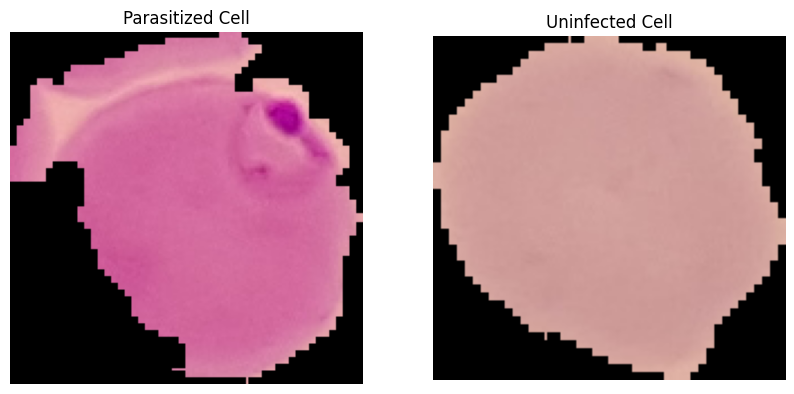

In [96]:
# Display some sample images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display a parasitized cell image
parasitized_sample = mpimg.imread(os.path.join(parasitized_dir, os.listdir(parasitized_dir)[0]))
ax[0].imshow(parasitized_sample)
ax[0].set_title('Parasitized Cell')
ax[0].axis('off')

# Display an uninfected cell image
uninfected_sample = mpimg.imread(os.path.join(uninfected_dir, os.listdir(uninfected_dir)[0]))
ax[1].imshow(uninfected_sample)
ax[1].set_title('Uninfected Cell')
ax[1].axis('off')

plt.show()

### **DATA PREPROCESSING**

In [25]:
def load_images(file_list, folder, label):
    valid_extensions = ('.png', '.jpg', '.jpeg')  # Acceptable image formats
    for filename in tqdm(file_list):
        if not filename.lower().endswith(valid_extensions):
            continue  # Skip non-image files like Thumbs.db
        img_path = os.path.join(folder, filename)
        try:
            img = load_img(img_path, target_size=IMAGE_SIZE)
            img_array = img_to_array(img) / 255.0  # Rescale here
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Failed to process {filename}: {e}")


In [26]:
# Process both classes
# Load 1000 parasitized and 1000 uninfected images
load_images(parasitized_files, parasitized_dir, 1)
load_images(uninfected_files, uninfected_dir, 0)


100%|██████████| 2000/2000 [25:31<00:00,  1.31it/s]


In [27]:
# Convert lists to numpy arrays
X = np.array(images, dtype='float32')
y = np.array(labels, dtype='int')

### **SPLITTING AND SHUFFLING DATA**

In [ ]:
# Shuffle and split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


### **SAVING AND LOADING PROCESSED DATA**

In [28]:
# Save the processed data
np.save('X_train_2000.npy', X_train)
np.save('y_train_2000.npy', y_train)
np.save('X_val_2000.npy', X_val)
np.save('y_val_2000.npy', y_val)
np.save('X_test_2000.npy', X_test)
np.save('y_test_2000.npy', y_test)

print(f"Preprocessed 2000 images!\nTrain: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Preprocessed 2000 images!
Train: (4200, 64, 64, 3), Validation: (900, 64, 64, 3), Test: (900, 64, 64, 3)


In [29]:
# Load the 2000-sample dataset
X_train = np.load('X_train_2000.npy')
y_train = np.load('y_train_2000.npy')
X_val = np.load('X_val_2000.npy')
y_val = np.load('y_val_2000.npy')
X_test = np.load('X_test_2000.npy')
y_test = np.load('y_test_2000.npy')

# Confirm the data shape
print(f"Loaded Data Shapes:\nTrain: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Loaded Data Shapes:
Train: (4200, 64, 64, 3), Val: (900, 64, 64, 3), Test: (900, 64, 64, 3)


### **IMPORT NECESSARY LIBRARIES**

In [75]:
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


### **BUILD THE MODEL**

In [76]:
# create a model

cnn_1 = Sequential([
    Conv2D(filters = 15,
           kernel_size = 3, # can also be (3, 3)
           padding = 'same',
           activation = 'relu',
           input_shape = (64, 64, 3)),

    Conv2D(16, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),

    Conv2D(16, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(250, activation = 'relu'),
    Dense(2, activation = 'sigmoid') # 2 classes: parasitized & uninfected
])

### **COMPILE THE MODEL**

In [77]:
# compile the model

cnn_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

In [78]:
cnn_1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 64, 64, 15)          │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 64, 64, 16)          │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 32, 32, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 250)                 │       1,024,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 2)                   │             502 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,029,668 (3.93 MB)

 Trainable params: 1,029,668 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

### **TRAIN THE MODEL**

In [90]:
history_1 = cnn_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=7,
    batch_size=32
)


Epoch 1/7
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 5.2335e-07 - val_accuracy: 0.9433 - val_loss: 0.5867
Epoch 2/7
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 4.2025e-07 - val_accuracy: 0.9433 - val_loss: 0.5895
Epoch 3/7
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 4.7597e-07 - val_accuracy: 0.9433 - val_loss: 0.5919
Epoch 4/7
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.7748e-07 - val_accuracy: 0.9433 - val_loss: 0.5940
Epoch 5/7
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.4413e-07 - val_accuracy: 0.9433 - val_loss: 0.5971
Epoch 6/7
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.4465e-07 - val_accuracy: 0.9433 - val_loss: 0.5997
Epoch 7/7
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.5990e-07 - val_accuracy: 0.9433 - val_loss: 0.6032


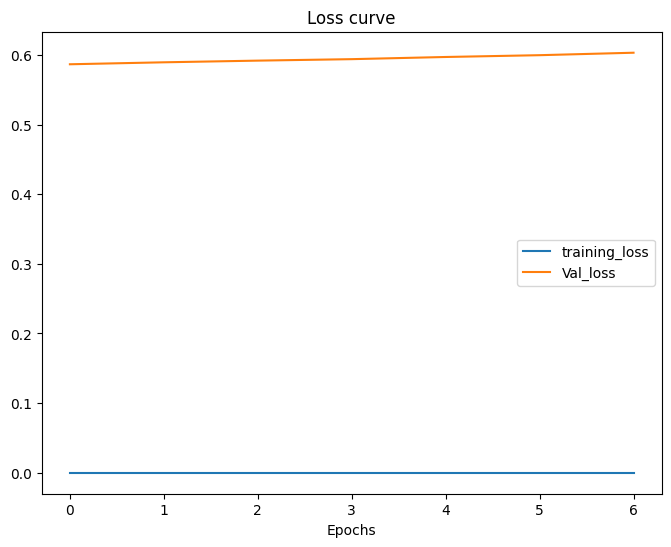

In [109]:
# plot loss curve
plt.figure(figsize = (8, 6))
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(len(history_1.history['loss']))
plt.plot(epochs, loss, label = 'training_loss')
plt.plot(epochs, val_loss, label = 'Val_loss')
plt.xlabel('Epochs')
plt.title('Loss curve')
plt.legend()


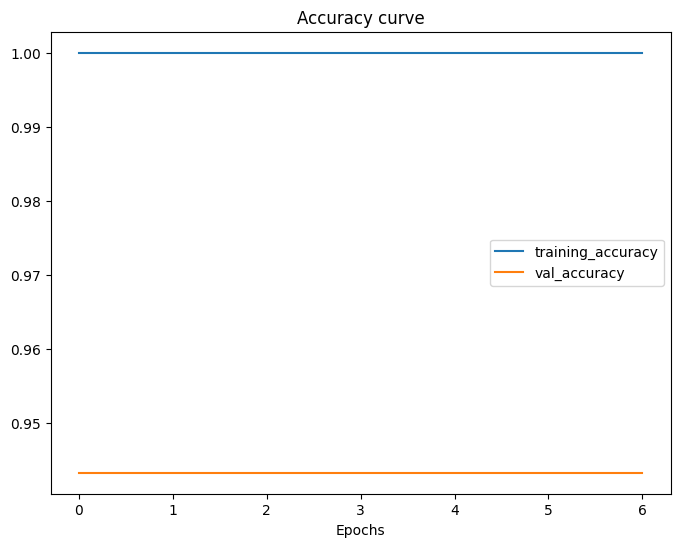

In [110]:
# plot accuracy curve
plt.figure(figsize = (8, 6))
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']
epochs = range(len(history_1.history['loss']))
plt.plot(epochs, accuracy, label = 'training_accuracy')
plt.plot(epochs, val_accuracy, label = 'val_accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy curve')
plt.legend();


### **EVALUATE THE MODEL**

In [88]:
# Evaluate on test data
test_loss, test_acc = cnn_1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9361 - loss: 0.6294
Test Accuracy: 0.9300
Test Loss: 0.7384


In [102]:
# prediction probabilities
pred_probs = cnn_1.predict(X_test)
pred_probs[0]

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([7.88061e-19, 1.00000e+00], dtype=float32)

In [105]:
# get the class with the max probabilities
y_pred = tf.argmax(pred_probs, axis = 1)
y_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])>

### **CONFUSION MATRIX AND CLASSIFICATION REPORT**

In [106]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_true=y_test,
                 y_pred=y_pred)

array([[425,  25],
       [ 37, 413]])

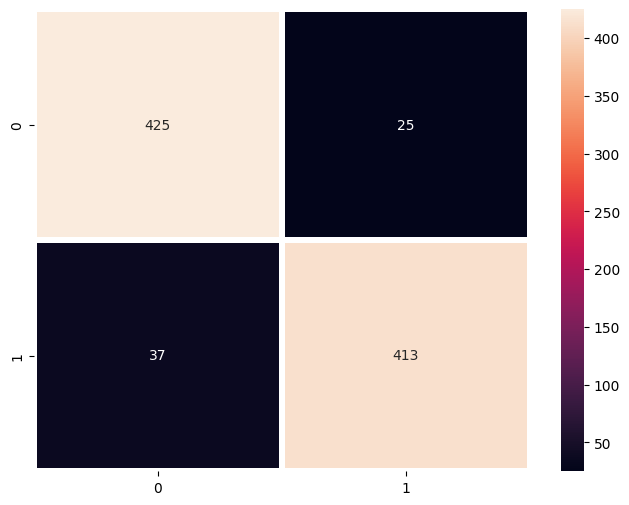

In [107]:
# prettified confusion matrix
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_true=y_test,
                 y_pred=y_pred), annot = True, fmt = 'd', linewidth = 4)
plt.show()

In [108]:
# classification_report
print(classification_report(y_true=y_test,
                 y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       450
           1       0.94      0.92      0.93       450

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [100]:
# Save the entire model
model.save('malaria_cell_classifier.keras')  # Saved in HDF5 format
print("Model saved successfully as 'malaria_cell_classifier.keras'")


Model saved successfully as 'malaria_cell_classifier'
